The centre error = -5.46 to the LEFT


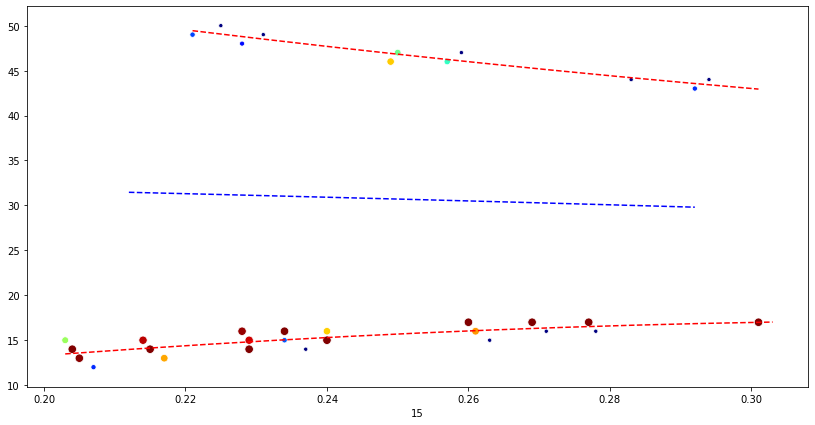

total time elapsed = 2.5181829929351807 seconds
The centre error = -5.48 to the LEFT


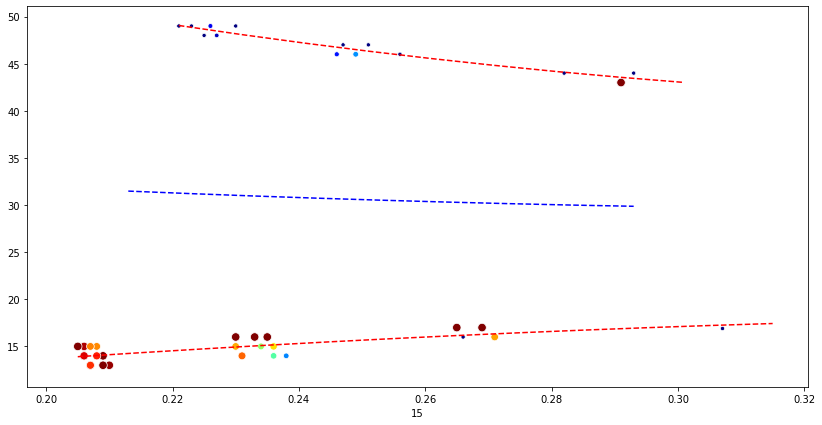

total time elapsed = 1.5658702850341797 seconds
The centre error = -5.71 to the LEFT


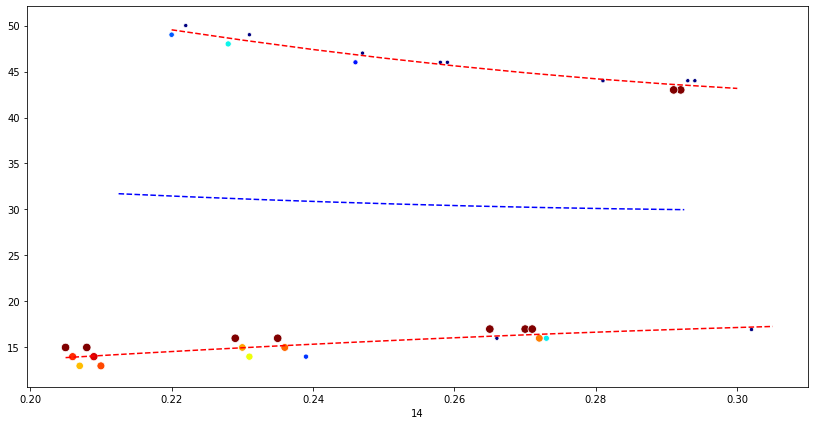

total time elapsed = 1.592111587524414 seconds
total time elapsed = 0.012979269027709961 seconds
The centre error = -6.7 to the LEFT


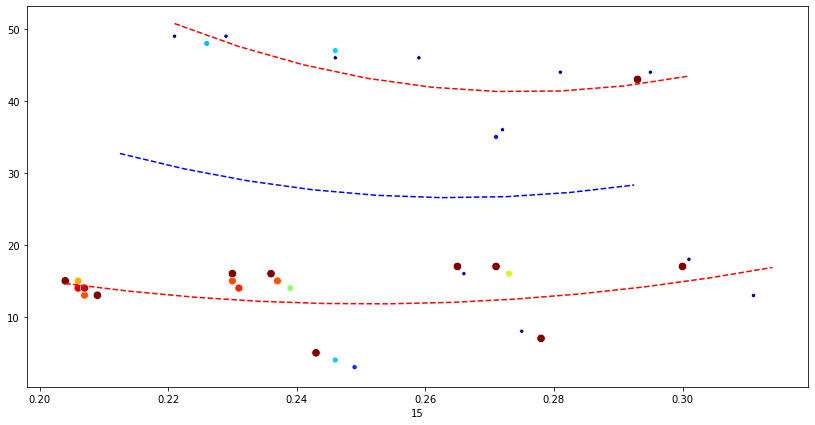

total time elapsed = 1.524031639099121 seconds
The centre error = 5.38 to the RIGHT


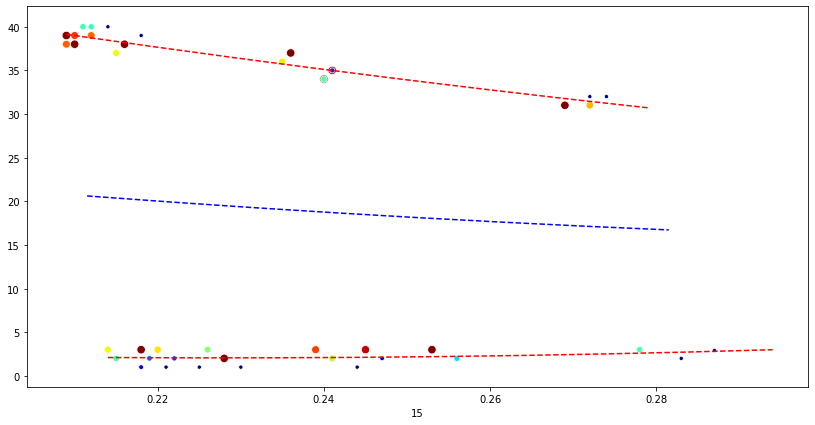

total time elapsed = 1.5667698383331299 seconds
The centre error = 5.22 to the RIGHT


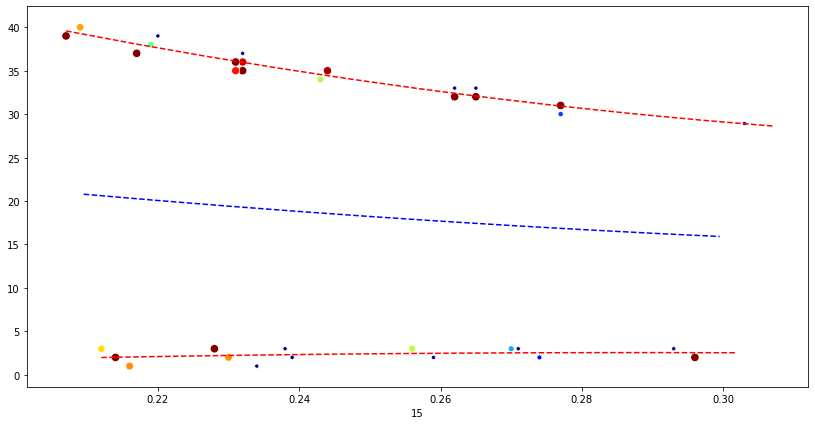

total time elapsed = 1.5119309425354004 seconds
The centre error = -3.99 to the LEFT


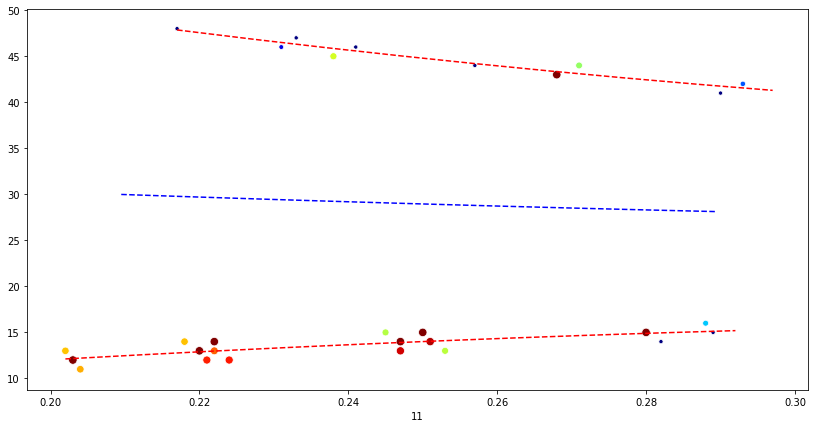

total time elapsed = 1.4718127250671387 seconds
The centre error = -4.27 to the LEFT


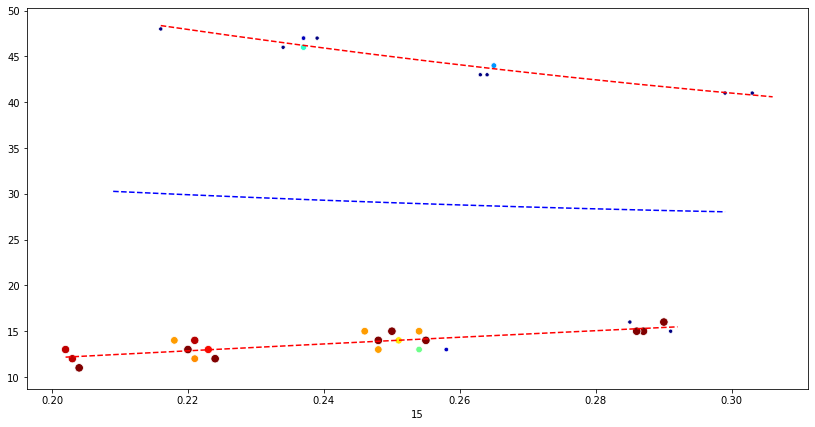

total time elapsed = 1.5266056060791016 seconds
The centre error = -4.23 to the LEFT


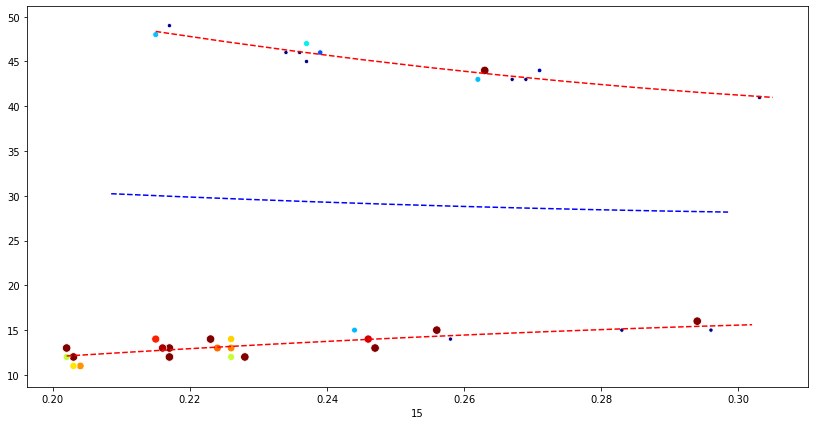

total time elapsed = 1.5886530876159668 seconds
The centre error = -4.38 to the LEFT


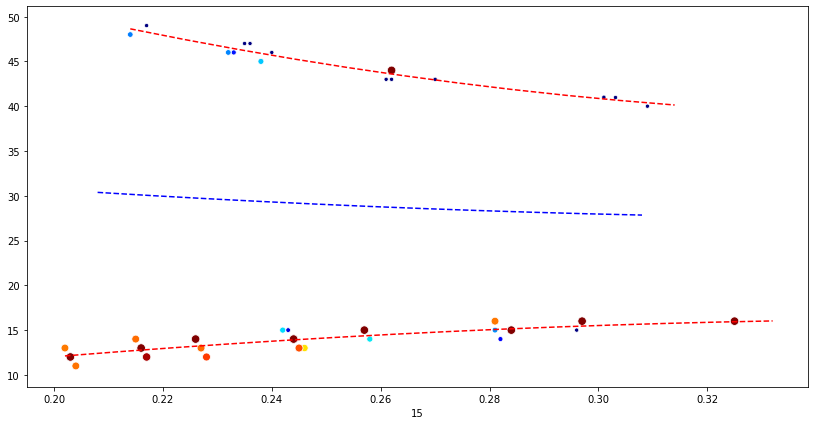

total time elapsed = 1.4279439449310303 seconds
total time elapsed = 0.013286828994750977 seconds
The centre error = -5.13 to the LEFT


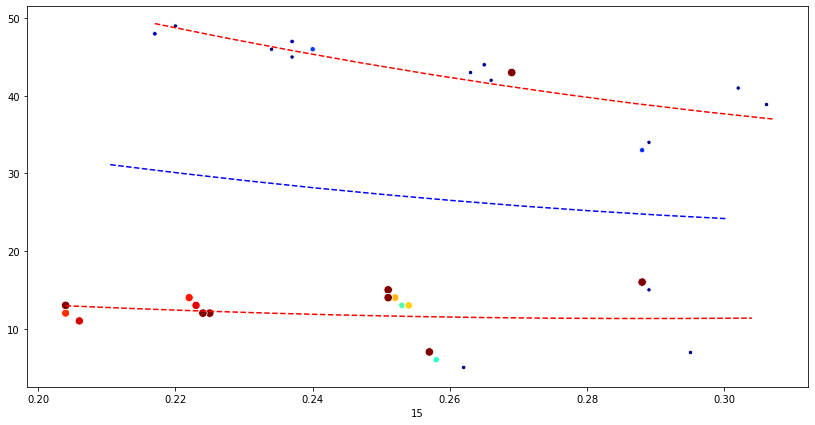

total time elapsed = 1.3728294372558594 seconds
The centre error = 2.09 to the RIGHT


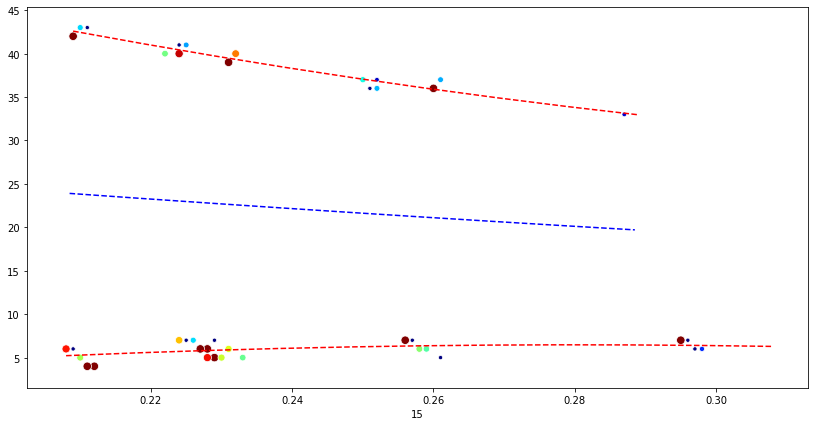

total time elapsed = 1.3649563789367676 seconds
The centre error = 2.44 to the RIGHT


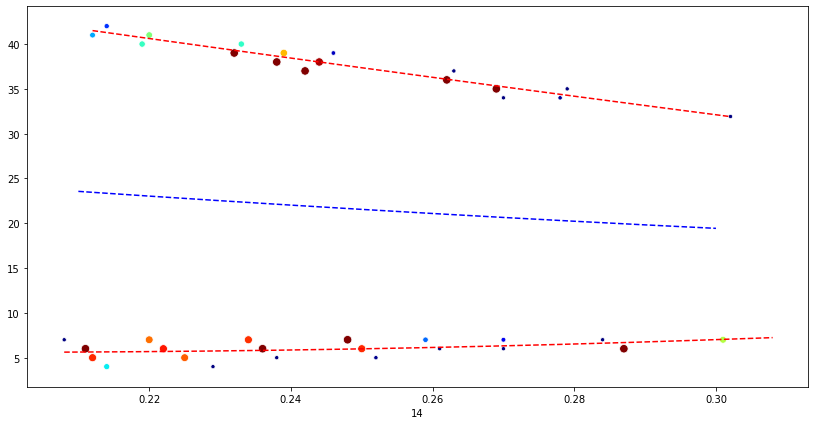

total time elapsed = 1.5607585906982422 seconds
The centre error = 2.44 to the RIGHT


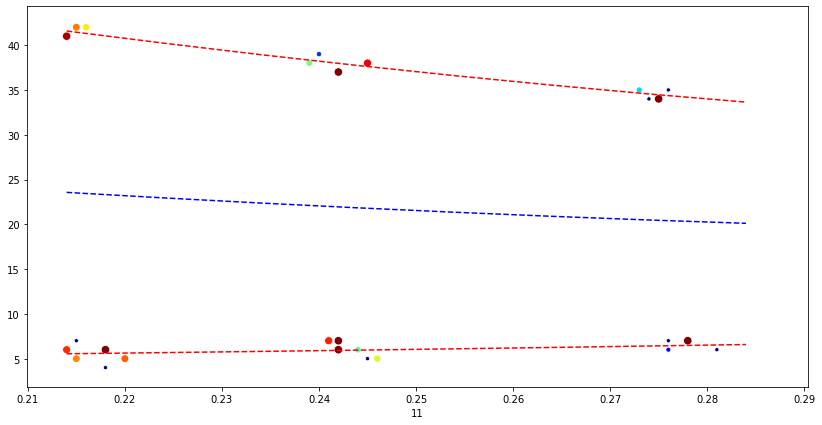

total time elapsed = 1.4654350280761719 seconds
The centre error = 2.27 to the RIGHT


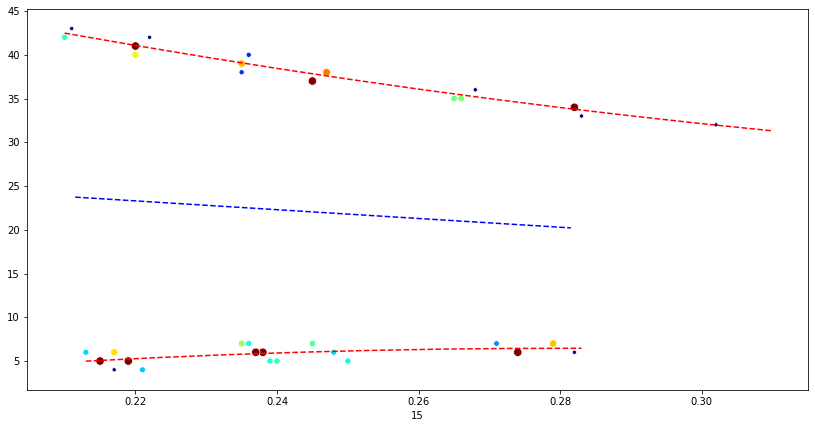

total time elapsed = 1.4997797012329102 seconds
The centre error = -1.3 to the LEFT


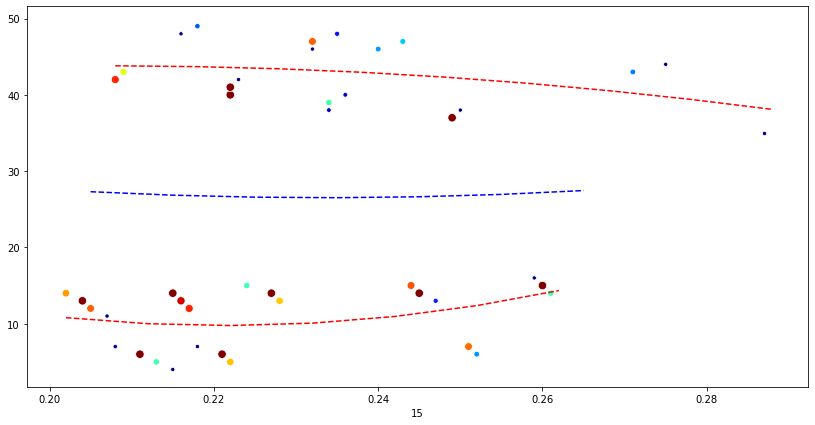

total time elapsed = 1.4570972919464111 seconds
The centre error = -4.53 to the LEFT


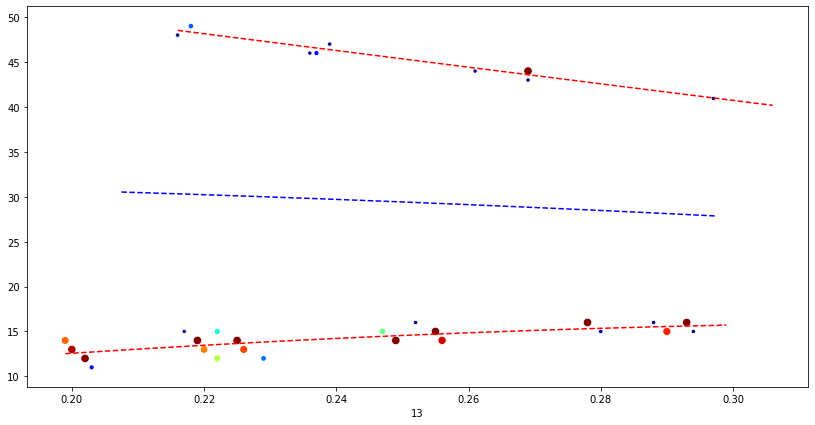

total time elapsed = 1.3941936492919922 seconds
The centre error = -4.62 to the LEFT


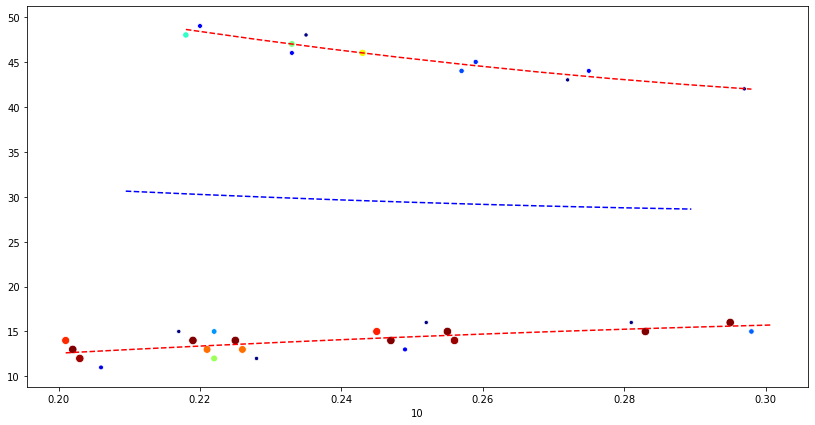

total time elapsed = 1.3692634105682373 seconds
The centre error = -4.23 to the LEFT


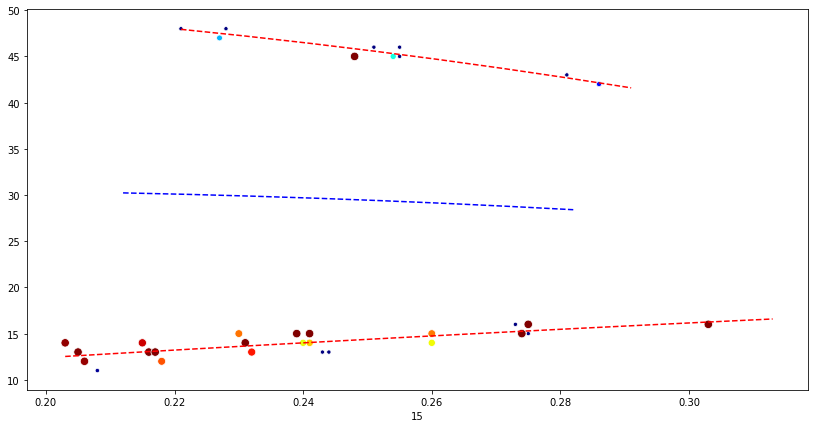

total time elapsed = 1.5200188159942627 seconds
The centre error = -4.3 to the LEFT


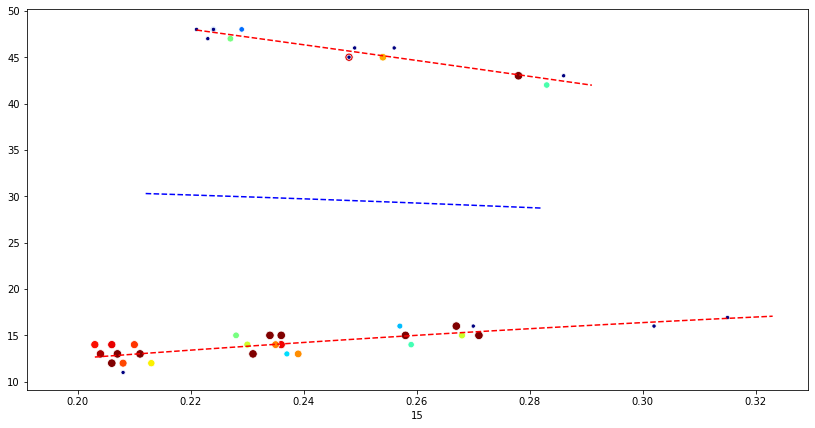

total time elapsed = 1.4028868675231934 seconds
The centre error = -4.79 to the LEFT


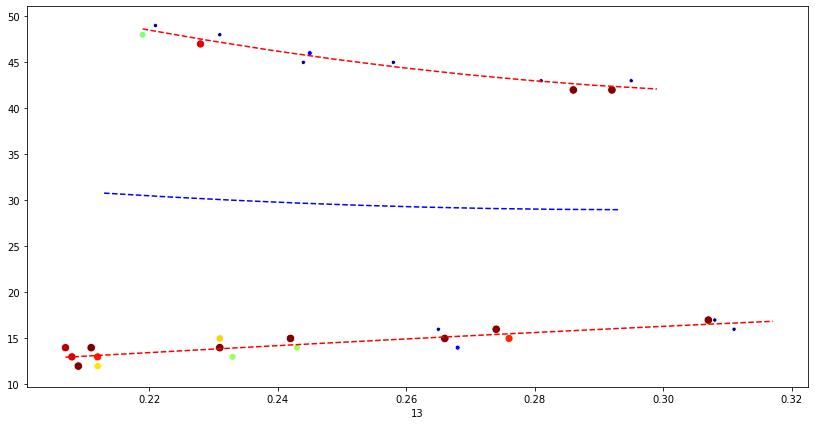

total time elapsed = 1.4917693138122559 seconds
total time elapsed = 0.016148090362548828 seconds
The centre error = -5.53 to the LEFT


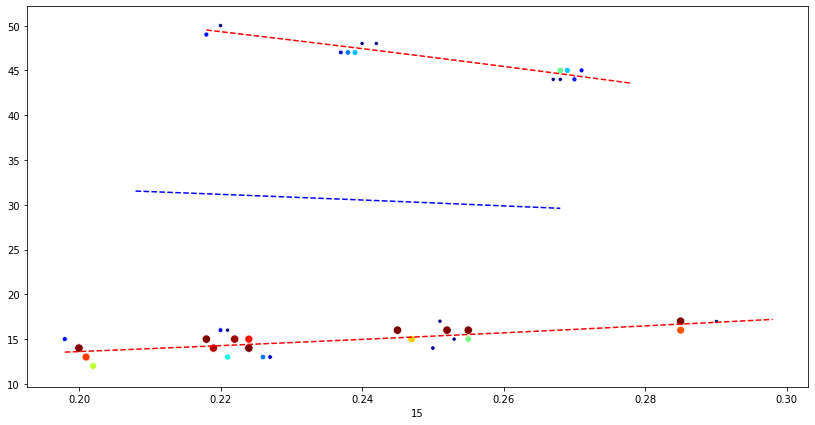

total time elapsed = 1.5731878280639648 seconds
The centre error = -5.52 to the LEFT


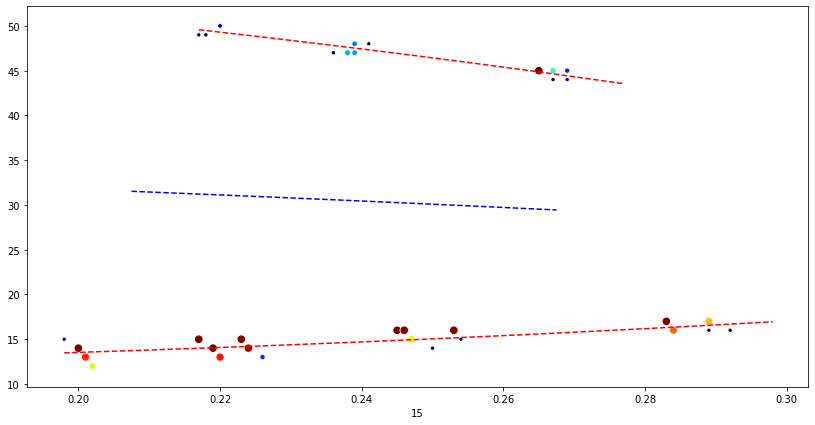

total time elapsed = 1.4194529056549072 seconds
total time elapsed = 0.01940321922302246 seconds
The centre error = -5.43 to the LEFT


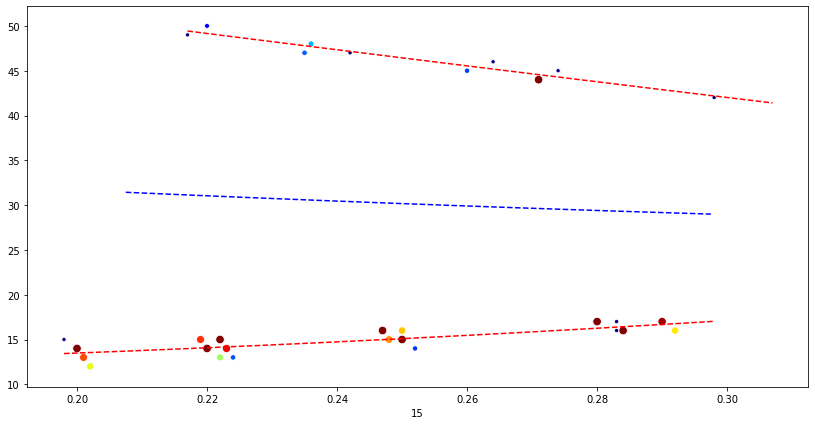

total time elapsed = 1.3459246158599854 seconds
The centre error = -5.07 to the LEFT


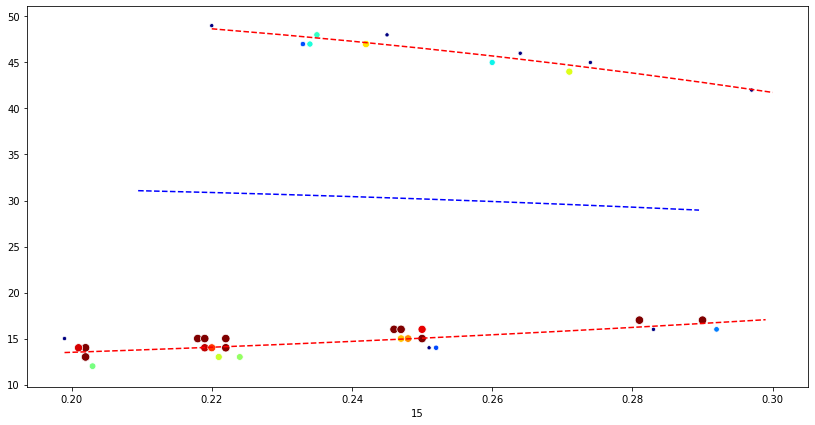

total time elapsed = 1.5375635623931885 seconds
The centre error = -5.57 to the LEFT


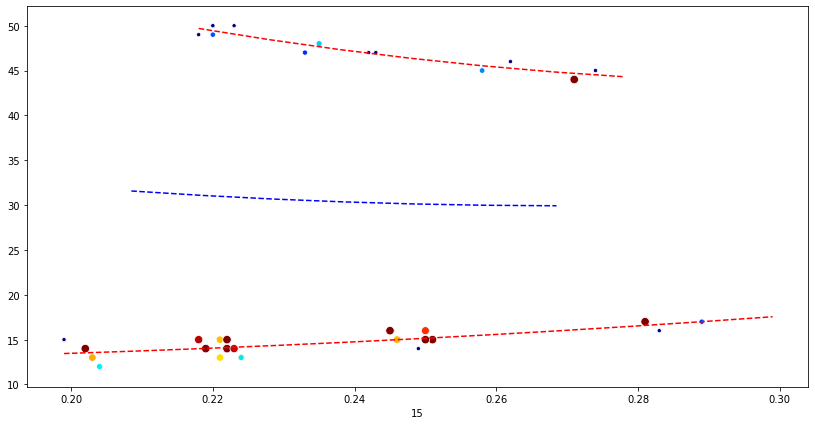

total time elapsed = 1.3671650886535645 seconds
total time elapsed = 0.013843059539794922 seconds
total time elapsed = 0.014469623565673828 seconds
The centre error = -5.32 to the LEFT


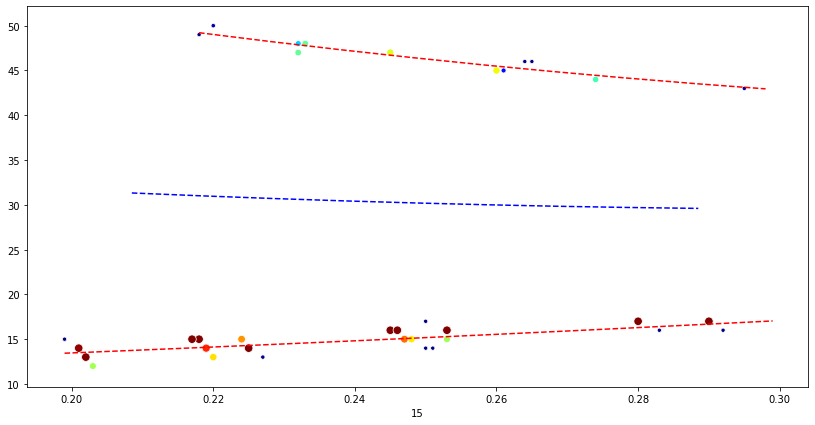

total time elapsed = 1.6228113174438477 seconds
The centre error = -5.27 to the LEFT


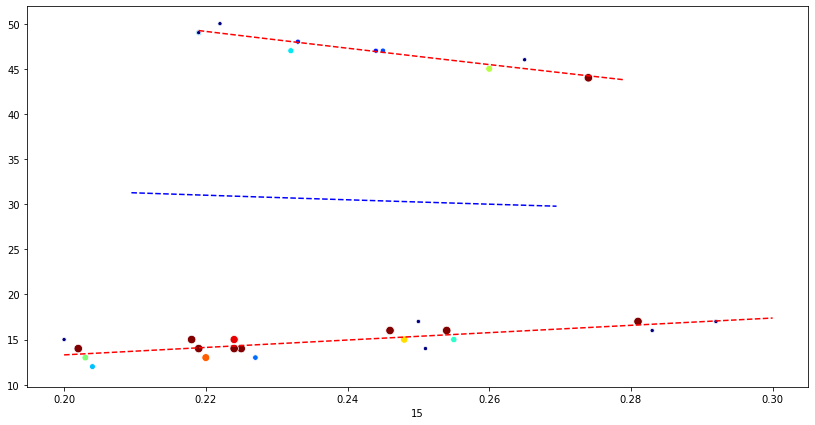

total time elapsed = 1.4107294082641602 seconds
total time elapsed = 0.015418767929077148 seconds
The centre error = -5.54 to the LEFT


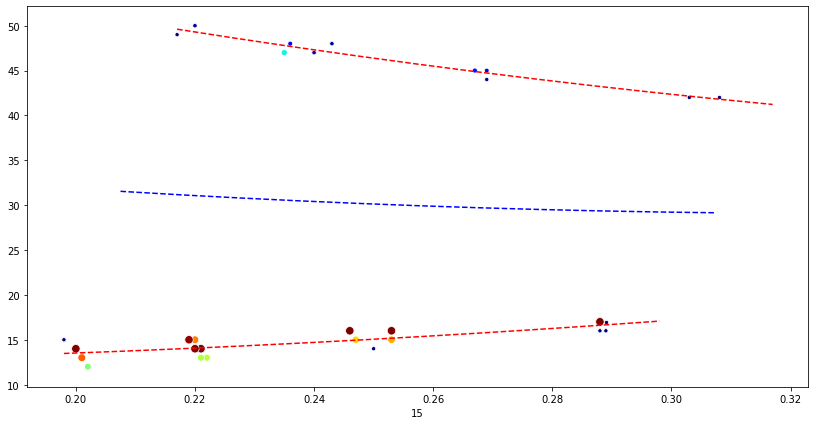

total time elapsed = 1.5029456615447998 seconds
The centre error = -5.06 to the LEFT


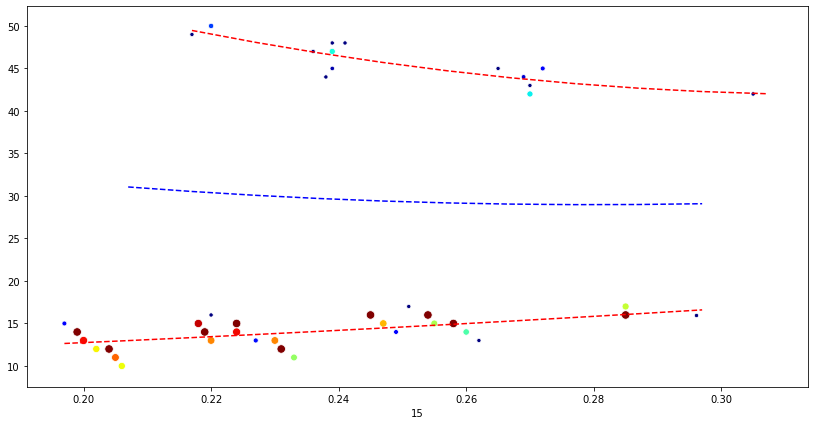

total time elapsed = 1.5133895874023438 seconds
The centre error = -2.56 to the LEFT


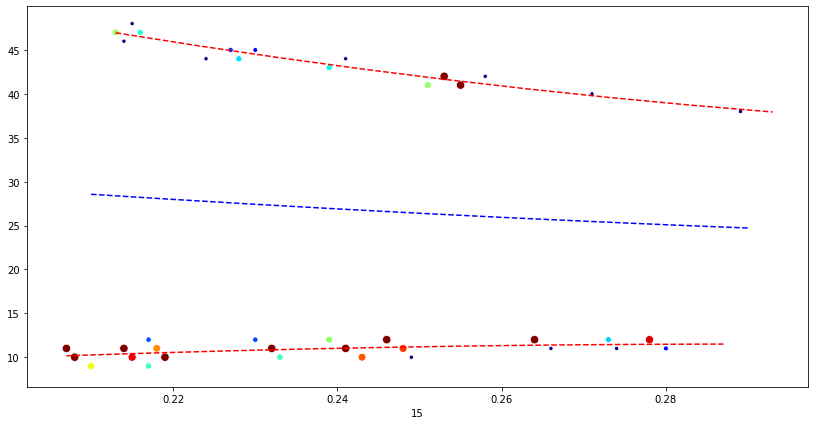

total time elapsed = 1.5574960708618164 seconds
The centre error = -2.39 to the LEFT


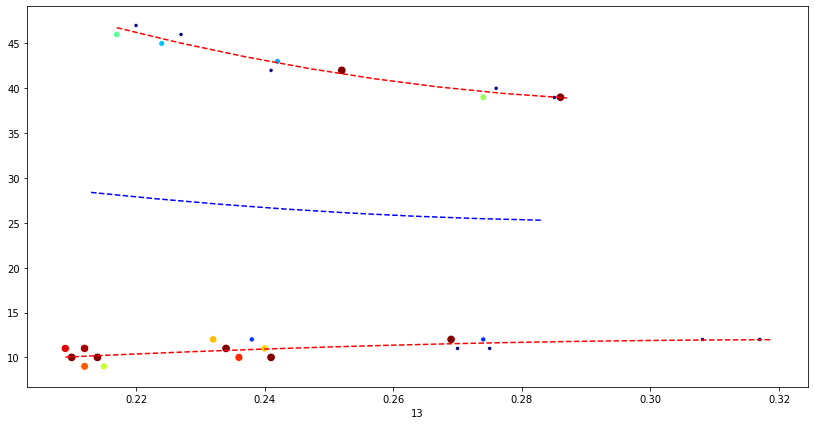

total time elapsed = 1.4955182075500488 seconds
The centre error = -2.08 to the LEFT


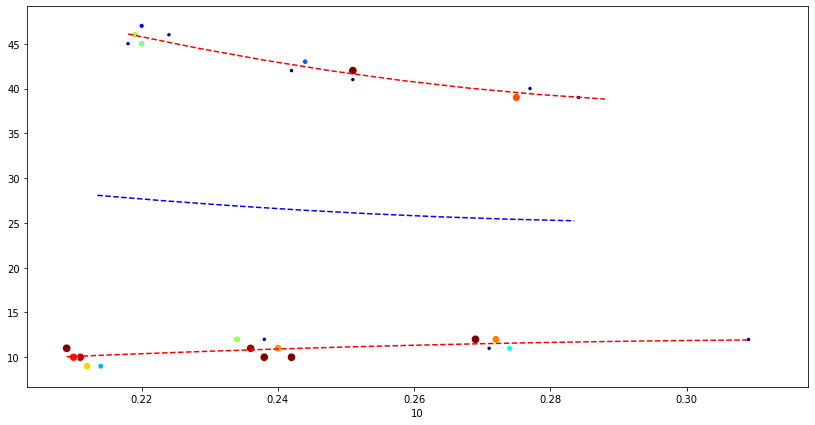

total time elapsed = 1.4537341594696045 seconds
The centre error = -2.17 to the LEFT


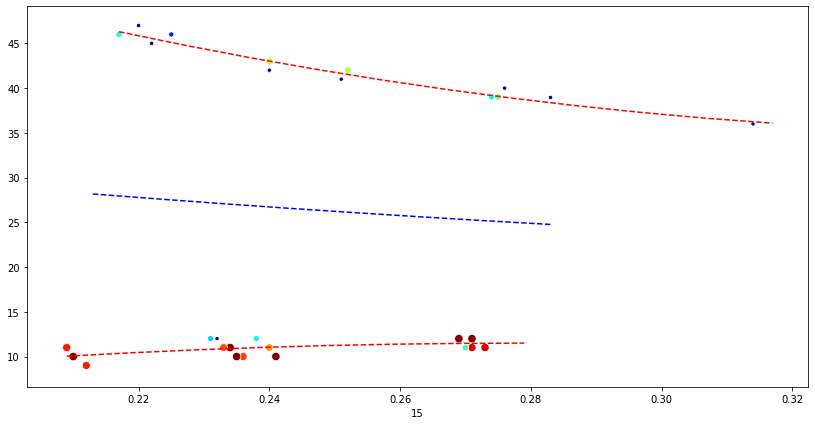

total time elapsed = 1.5196576118469238 seconds
The centre error = -2.31 to the LEFT


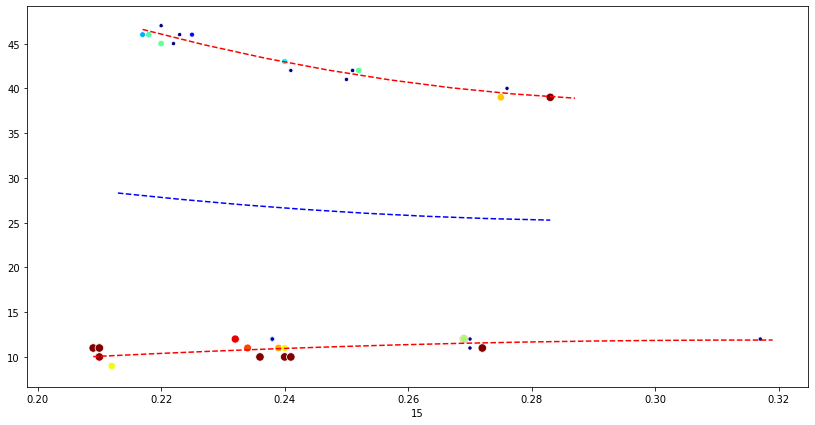

total time elapsed = 1.3963451385498047 seconds
The centre error = -2.29 to the LEFT


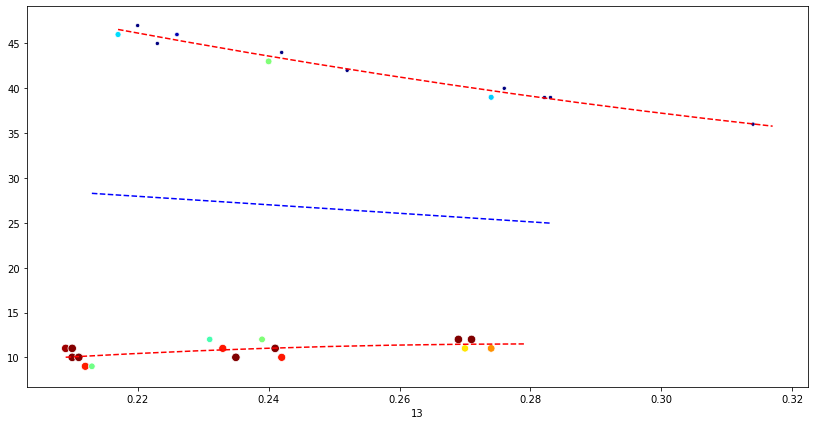

total time elapsed = 1.4160501956939697 seconds
The centre error = -2.12 to the LEFT


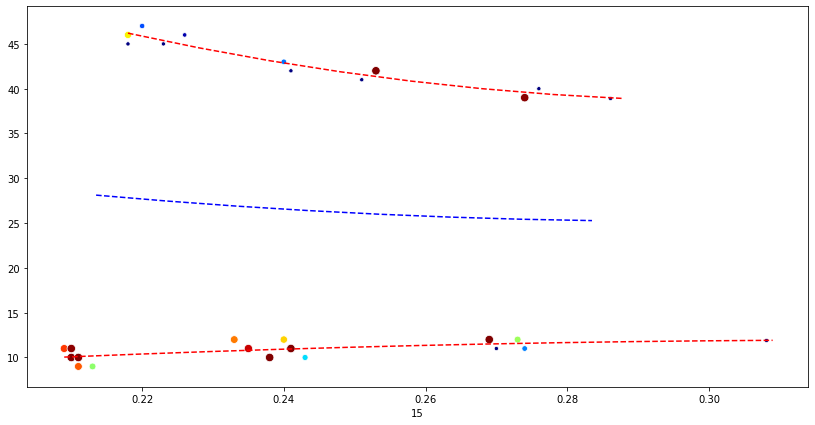

total time elapsed = 1.34515380859375 seconds
The centre error = -2.08 to the LEFT


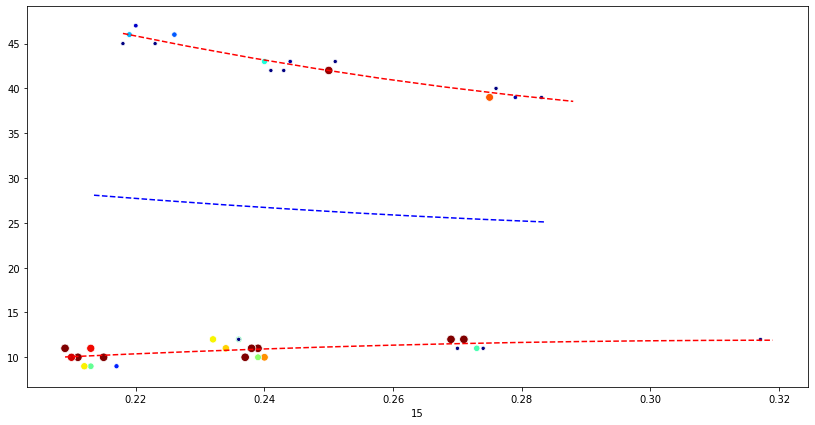

total time elapsed = 1.5952603816986084 seconds
The centre error = -1.79 to the LEFT


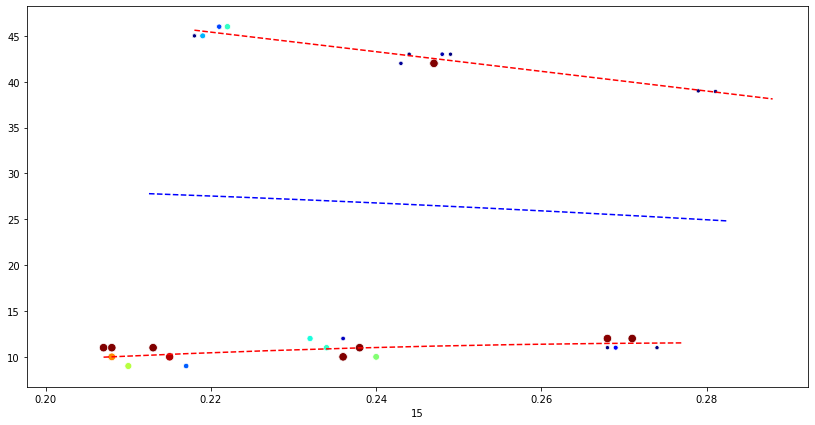

total time elapsed = 1.5401325225830078 seconds
The centre error = -1.77 to the LEFT


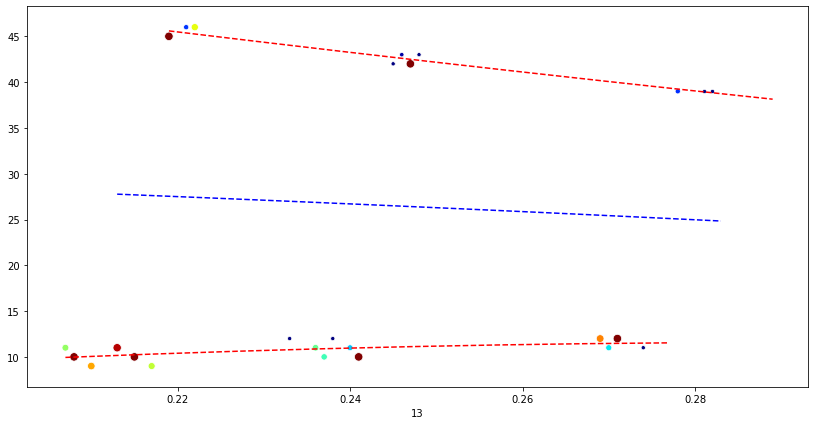

total time elapsed = 1.480126142501831 seconds
total time elapsed = 0.013703584671020508 seconds
The centre error = -1.94 to the LEFT


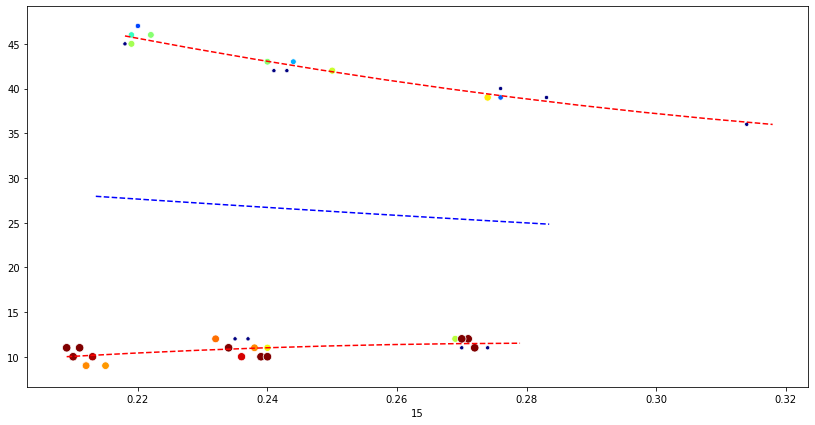

total time elapsed = 1.5113615989685059 seconds
The centre error = -2.41 to the LEFT


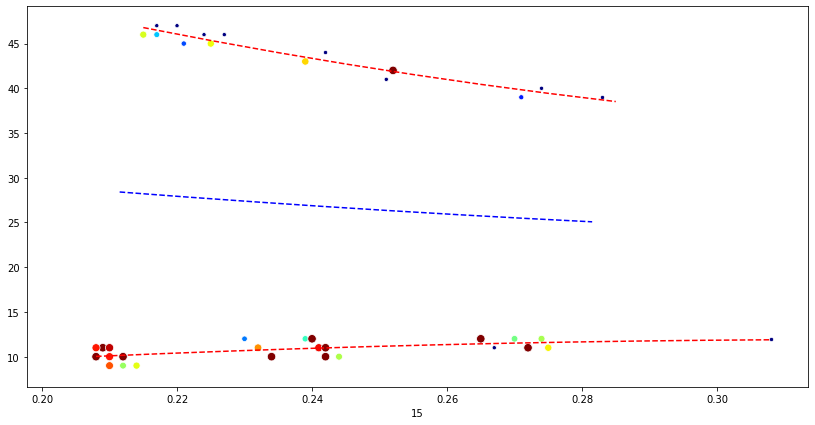

total time elapsed = 1.4431545734405518 seconds
The centre error = -2.38 to the LEFT


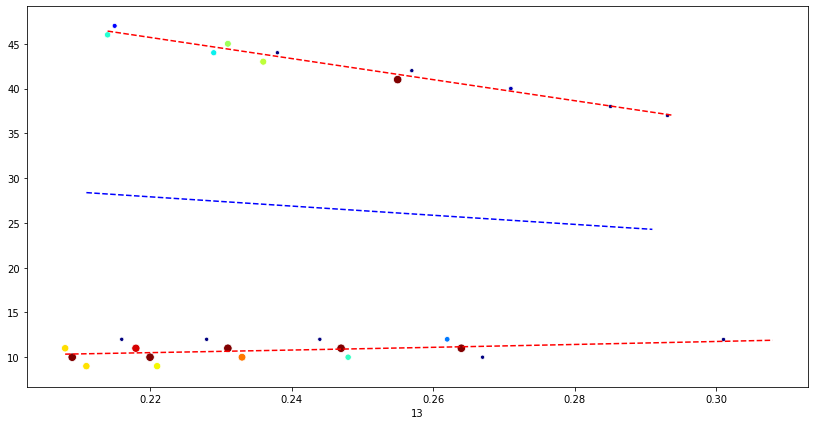

total time elapsed = 1.3545901775360107 seconds
The centre error = 0.76 to the RIGHT


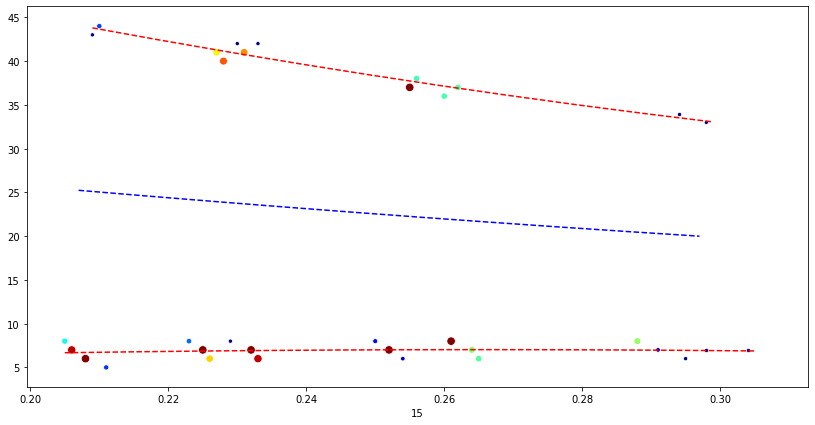

total time elapsed = 1.5248675346374512 seconds
The centre error = 0.48 to the RIGHT


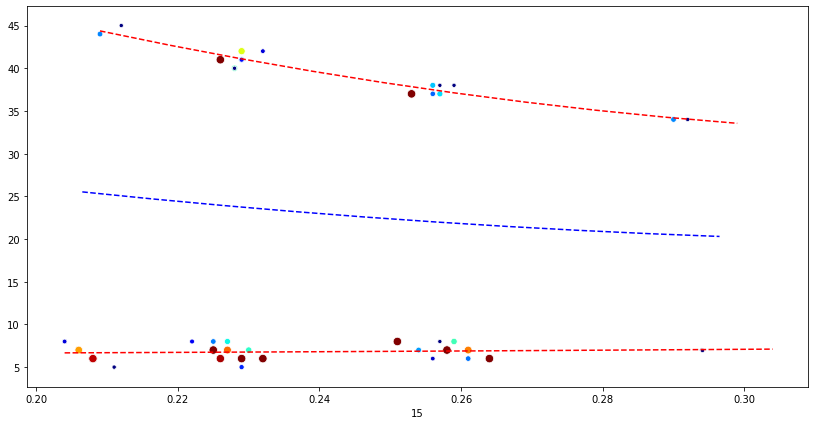

total time elapsed = 1.5587718486785889 seconds
The centre error = 0.56 to the RIGHT


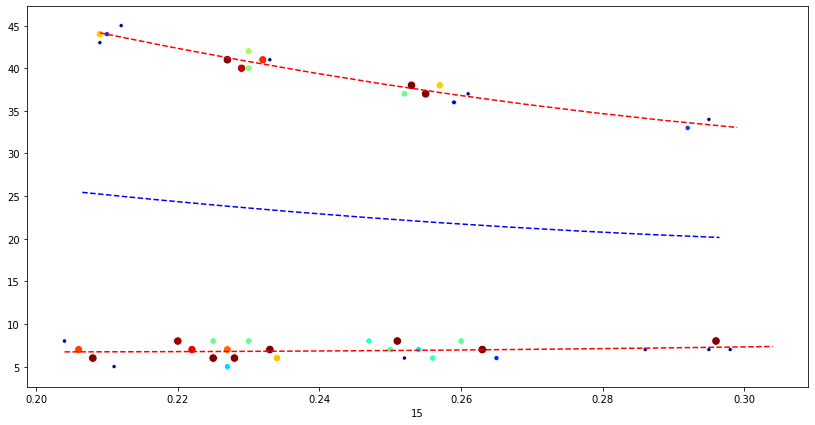

total time elapsed = 1.5354769229888916 seconds
The centre error = 0.47 to the RIGHT


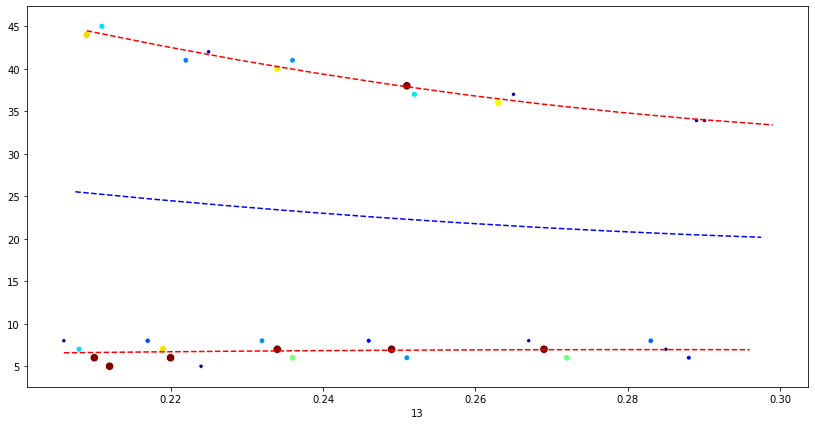

total time elapsed = 1.3872716426849365 seconds
The centre error = 0.34 to the RIGHT


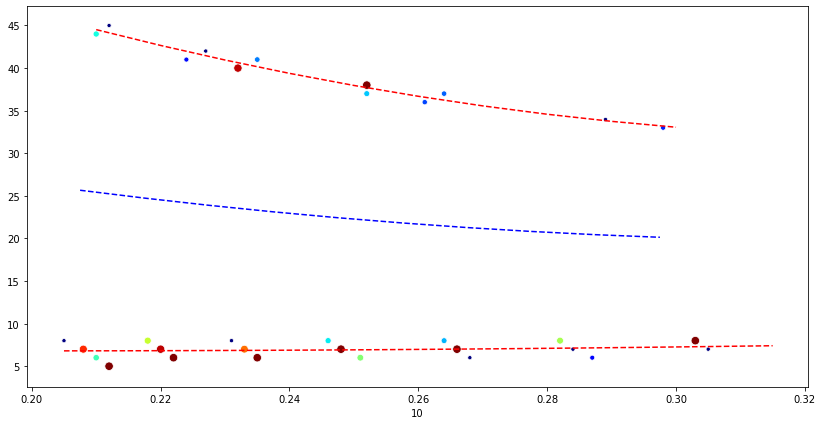

total time elapsed = 1.4643051624298096 seconds
The centre error = 0.86 to the RIGHT


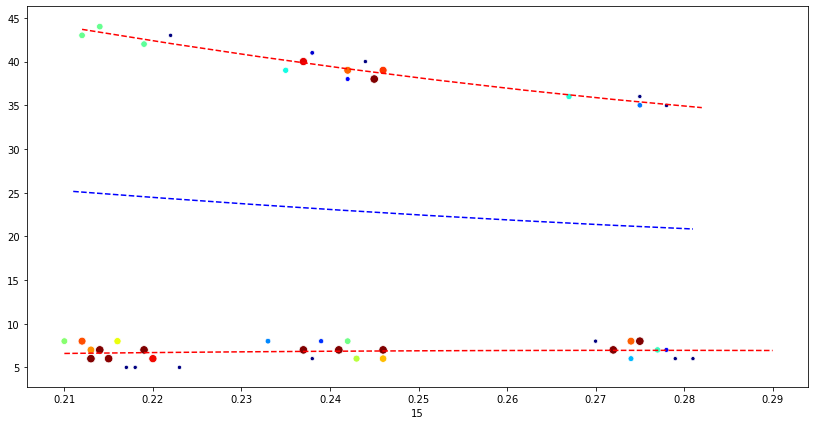

total time elapsed = 1.6012029647827148 seconds
The centre error = 0.67 to the RIGHT


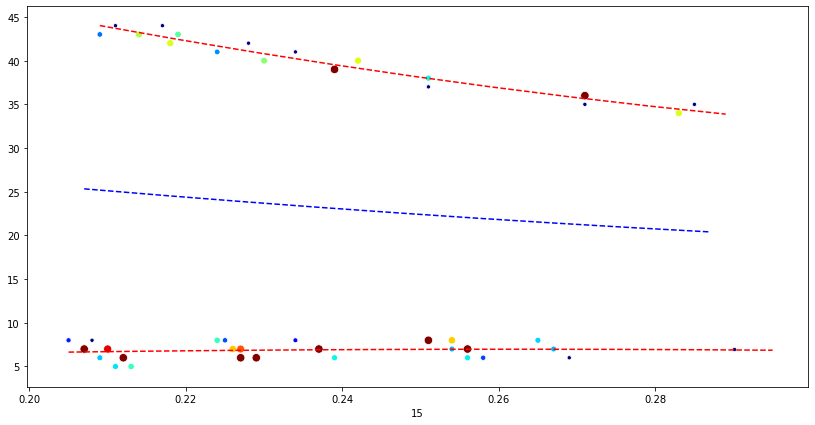

total time elapsed = 1.543217420578003 seconds
The centre error = 0.44 to the RIGHT


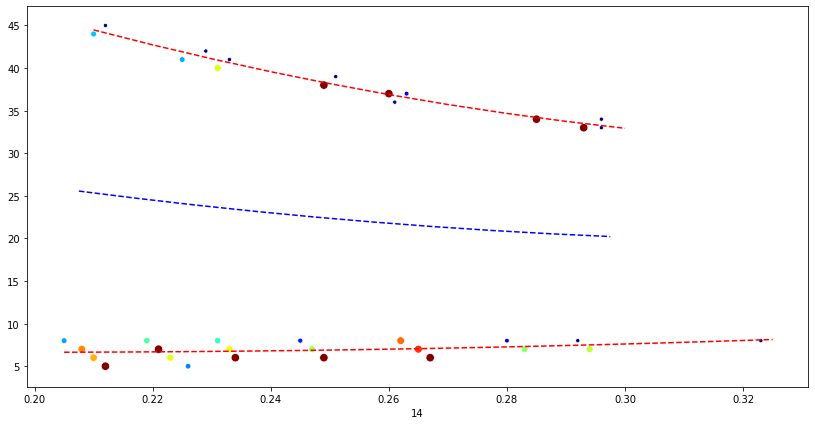

total time elapsed = 1.3742780685424805 seconds
The centre error = 0.78 to the RIGHT


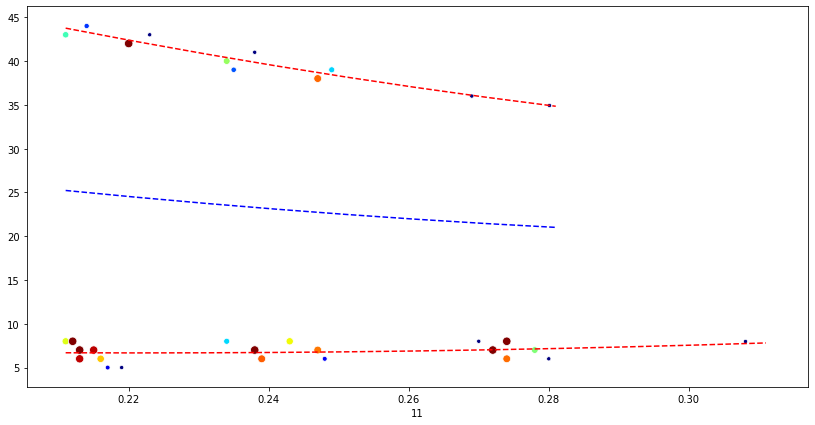

total time elapsed = 1.3589208126068115 seconds
The centre error = 0.86 to the RIGHT


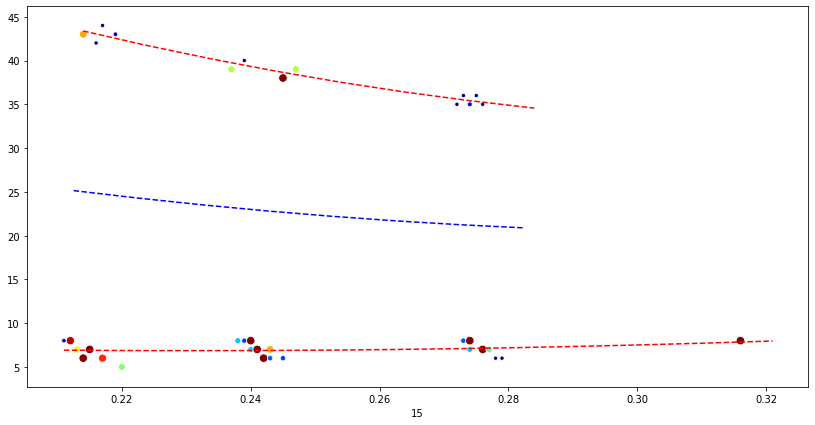

total time elapsed = 1.5109429359436035 seconds
The centre error = 1.05 to the RIGHT


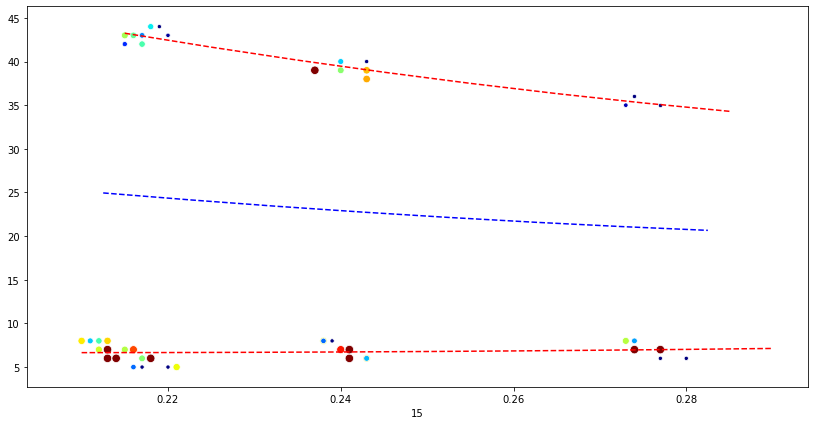

total time elapsed = 1.525963544845581 seconds
The centre error = 0.77 to the RIGHT


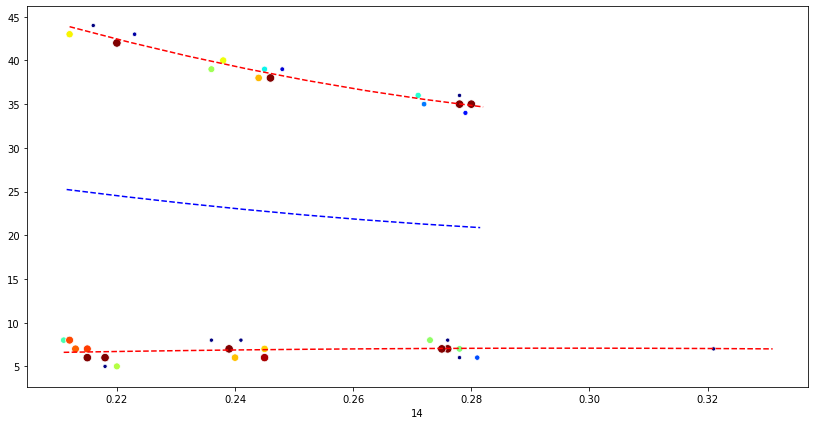

total time elapsed = 1.491231918334961 seconds
The centre error = 0.72 to the RIGHT


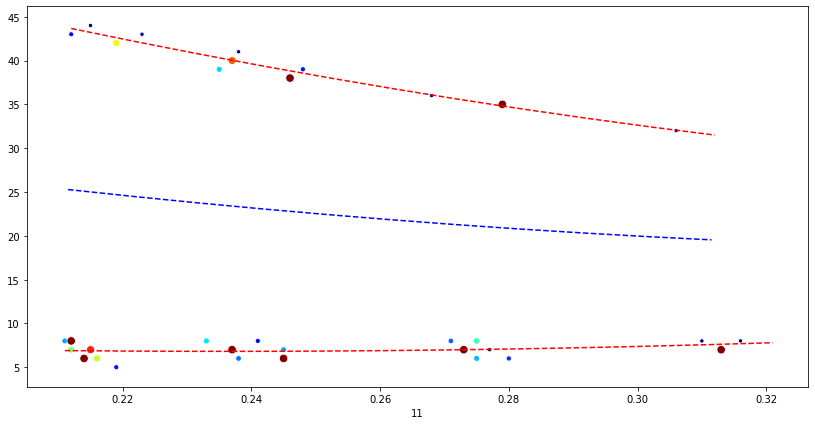

total time elapsed = 1.4899165630340576 seconds
The centre error = 0.86 to the RIGHT


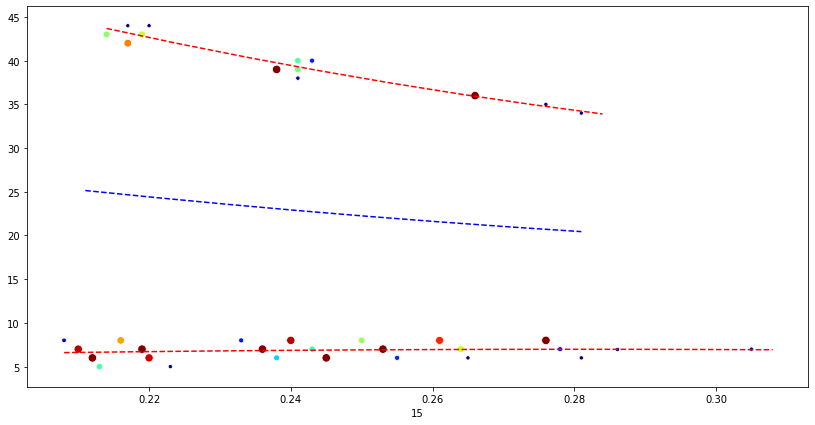

total time elapsed = 1.5354843139648438 seconds
The centre error = 0.76 to the RIGHT


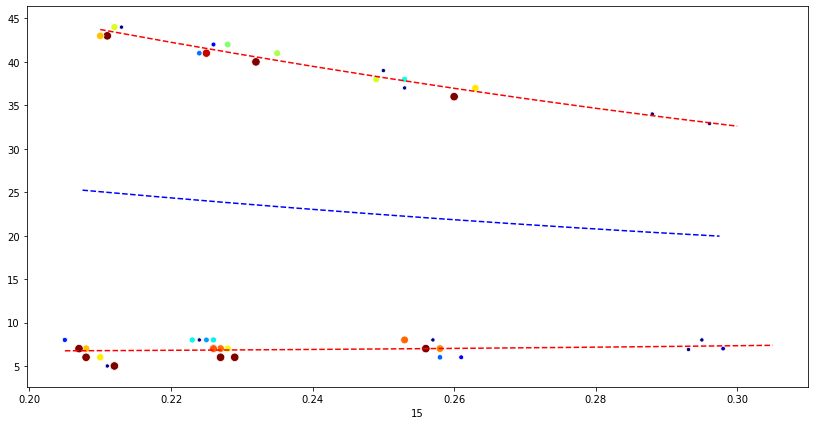

total time elapsed = 1.5753002166748047 seconds


In [1]:
import rospy
from sensor_msgs.msg import LaserScan
from geometry_msgs.msg import Twist
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import time
import serial

range_df = pd.DataFrame()
intensity_df = pd.DataFrame()
intensity_thresh = 1300
msgs_num_pline = 15 # pipeline of number of messages
column_ind = [*range(335,360,1)]+[*range(0,26,1)]
# Below deg value corresponds to 0 deg of the vehicle which means the vehicle centre.
# 26 because we have selected only 51 angular data points from 0 to 51 hence centre would be 26.
vehicle_centre = 26 

# setting up the serial communication channel for arduino
#ser = serial.Serial('/dev/ttyUSB0', 9600)

def lane_detection(msg):
    
    global range_df, intensity_df, intensity_thresh, msgs_num_pline, column_ind
    
    '''
    ind_max = msg.intensities.index(max(msg.intensities))
    ind_min = msg.intensities.index(min(msg.intensities))
    #print(type(msg.intensities[335]))
    #print('maximum distance ' +str(msg.ranges[ind])+ ' at ' +str(ind) +'\n'+'intensity ' +str(msg.intensities[ind])+ ' at ' +str(ind))
    #print('Maximum intensity '+str(max(msg.intensities))+' at '+str(ind_max))
    #print('Minimum intensity '+str(min(msg.intensities))+' at '+str(ind_min))
    #print(type([msg.ranges[335:]+msg.ranges[:26]]))
    '''
    
    # appending the sliced zone data in which the retro reflective tape points are recorded
    range_zone = pd.DataFrame([msg.ranges[335:]+msg.ranges[:26]])
    int_zone = pd.DataFrame([msg.intensities[335:]+msg.intensities[:26]])
    
    #range_df = range_df.append(range_zone[int_zone > 1000])
    #intensity_df = intensity_df.append(int_zone[int_zone > 1000])
    range_df = range_df.append(range_zone)
    intensity_df = intensity_df.append(int_zone)
    
    if intensity_df.shape[0] == msgs_num_pline:
        
        start_t = time.time()
        
        arr_size = range_df.shape[0]
        range_df = range_df.set_index([pd.Index([*range(1,arr_size+1,1)])])
        intensity_df = intensity_df.set_index([pd.Index([*range(1,arr_size+1,1)])])
        
        '''
        plt.figure(figsize=(15,10))

        for i in range(0,arr_size,1):
            sns.scatterplot(range_df.iloc[i], range_df.columns, hue=intensity_df.iloc[i], 
                            palette='jet', legend=False)

        plt.axhline(y=26, color='r', linestyle='--')
        '''
        
        lane_range = range_df[intensity_df > intensity_thresh]
        lane_int = intensity_df[intensity_df > intensity_thresh]
        
        '''
        plt.figure(figsize=(15,10))

        for i in range(0,arr_size,1):
            sns.scatterplot(lane_range.iloc[i], lane_range.columns, hue=lane_int.iloc[i], 
                            palette='jet', legend=False, size=lane_int.iloc[i])       
        '''
            
            
        def lanecurve_fit(start, end):
    
            x_range = []
            y_angle = []

            for idx in range(start,end,1):
                for id_col in range(0, lane_range.shape[0],1):
                    if not np.isnan(lane_range.iloc[id_col, idx]):
                        x_range.append(lane_range.iloc[id_col, idx])
                        y_angle.append(idx)

            # define the true objective function
            def objective(x, a, b, c, d):
                return a * x + b * x**2 + c * x**2 + d
            
            if len(x_range) >= 10:
                # curve fit
                popt, _ = curve_fit(objective, x_range, y_angle)

                a, b, c, d = popt

                x_line = np.arange(min(x_range), max(x_range)+0.01, 0.01)
                y_line = objective(x_line, a, b, c, d)
            
            else:
                x_line = []
                y_line = []
                
            return x_line, y_line
        
        
        right_lanex, right_laney = lanecurve_fit(0,(lane_range.shape[1]-25))
        left_lanex, left_laney = lanecurve_fit(25,lane_range.shape[1])
        midlane_x = [np.mean([right_lanex[i], left_lanex[i]]) 
                     for i in range(min([len(right_lanex), len(left_lanex)]))]
        midlane_y = [np.mean([right_laney[i], left_laney[i]]) 
                     for i in range(min([len(right_laney), len(left_laney)]))]
        
        if len(midlane_x) > 0 and len(midlane_y) > 0:
            
            centre_error = round((vehicle_centre - midlane_y[0]),2)
            if centre_error < 0:
                print('The centre error = '+str(centre_error)+' to the LEFT')
            else:
                print('The centre error = '+str(centre_error)+' to the RIGHT')
                
            error_encode = b'%f' %centre_error
            
            #ser.write(error_encode)
            
            plt.figure(figsize=(14,7))
            for i in range(0, arr_size,1):
                sns.scatterplot(lane_range.iloc[i], lane_range.columns, hue=lane_int.iloc[i], 
                                palette='jet', legend=False, 
                                size=lane_int.iloc[i])

            plt.plot(right_lanex, right_laney, '--', color='red')
            plt.plot(left_lanex, left_laney, '--', color='red')
            plt.plot(midlane_x, midlane_y, '--', color='blue')
            
            plt.pause(1)
        
        range_df = pd.DataFrame()
        intensity_df = pd.DataFrame()
        
        end_t = time.time()
        total_time = end_t - start_t
        
        print('total time elapsed = '+str(total_time)+' seconds')
    


rospy.init_node('obstacle_avoidance')
sub = rospy.Subscriber('/scan', LaserScan, lane_detection)
#pub = rospy.Publisher('/cmd_vel', Twist)
#move=Twist()
rospy.spin()

In [2]:
arr_size = range_df.shape[0]
range_df = range_df.set_index([pd.Index([*range(1,arr_size+1,1)])])
intensity_df = intensity_df.set_index([pd.Index([*range(1,arr_size+1,1)])])

IndexError: single positional indexer is out-of-bounds

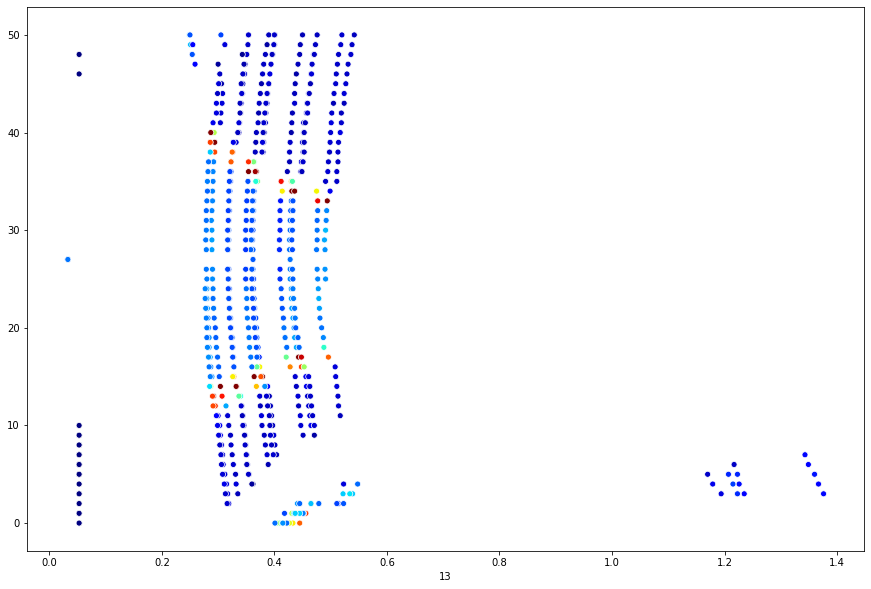

In [3]:
plt.figure(figsize=(15,10))

for i in range(1,15,1):
    sns.scatterplot(range_df.iloc[i], range_df.columns, hue=intensity_df.iloc[i], palette='jet', legend=False)
    
plt.axhline(y=26, color='r', linestyle='--')

Text(0, 0.5, 'Intensity amplitude')

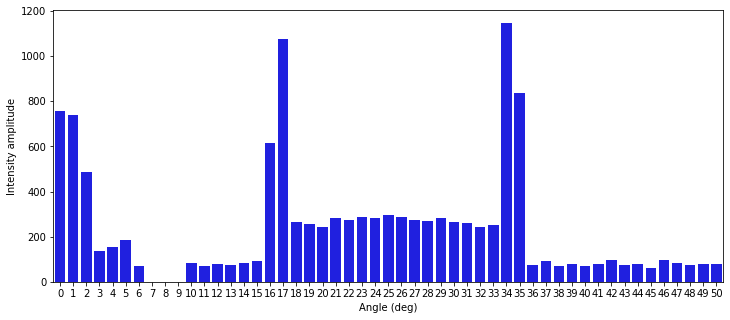

In [4]:
plt.figure(figsize=(12,5))

for i in range(3,4,1):
    sns.barplot(x= intensity_df.columns,y=intensity_df.iloc[i], color='blue')
    
plt.xlabel('Angle (deg)')
plt.ylabel('Intensity amplitude')

In [5]:
lane_range = range_df[intensity_df > 1200]
lane_int = intensity_df[intensity_df > 1200]

IndexError: single positional indexer is out-of-bounds

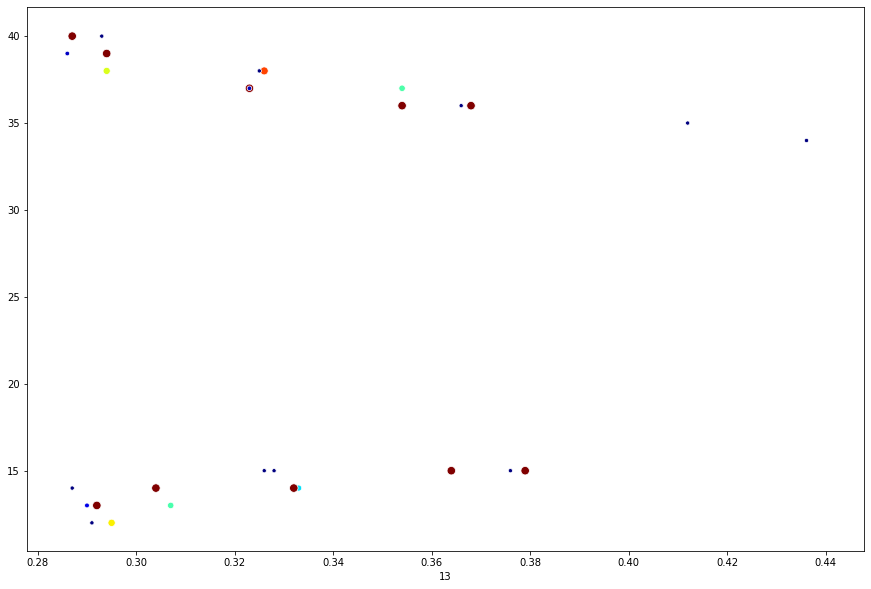

In [6]:
plt.figure(figsize=(15,10))

for i in range(0,88,1):
    sns.scatterplot(lane_range.iloc[i], lane_range.columns, hue=lane_int.iloc[i], palette='jet', legend=False, 
                    size=lane_int.iloc[i])

In [7]:
def lanecurve_fit(start, end):
    
    x_range = []
    y_angle = []

    for idx in range(start,end,1):
        for id_col in range(0, lane_range.shape[0],1):
            if not np.isnan(lane_range.iloc[id_col, idx]):
                x_range.append(lane_range.iloc[id_col, idx])
                y_angle.append(idx)
                
    # define the true objective function
    def objective(x, a, b, c, d):
        return a * x + b * x**2 + c * x**2 + d
    
    # curve fit
    popt, _ = curve_fit(objective, x_range, y_angle)
    
    a, b, c, d = popt
    
    x_line = np.arange(min(x_range), max(x_range)+0.01, 0.01)
    y_line = objective(x_line, a, b, c, d)
    
    return x_line, y_line

In [8]:
right_lanex, right_laney = lanecurve_fit(0,(lane_range.shape[1]-25))

In [9]:
left_lanex, left_laney = lanecurve_fit(25,lane_range.shape[1])

In [10]:
midlane_x = [np.mean([right_lanex[i], left_lanex[i]]) for i in range(len(right_lanex))]
midlane_y = [np.mean([right_laney[i], left_laney[i]]) for i in range(len(right_laney))]

IndexError: single positional indexer is out-of-bounds

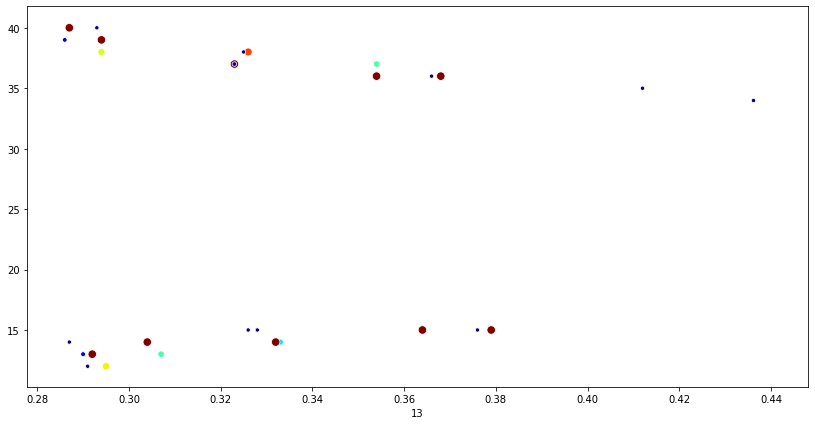

In [11]:
plt.figure(figsize=(14,7))

for i in range(0,88,1):
    sns.scatterplot(lane_range.iloc[i], lane_range.columns, hue=lane_int.iloc[i], palette='jet', legend=False, 
                    size=lane_int.iloc[i])
    
plt.plot(right_lanex, right_laney, '--', color='red')
plt.plot(left_lanex, left_laney, '--', color='red')
plt.plot(midlane_x, midlane_y, '--', color='blue')